#Assignment 3

Aleena Anna Plessey

21BCE5767 VIT Chennai


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('/content/penguins_size.csv')
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Task 3:univariate,bivariate and multi variate analysis

<ipython-input-9-3dfdd7889801>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.body_mass_g)


<Axes: xlabel='body_mass_g', ylabel='Density'>

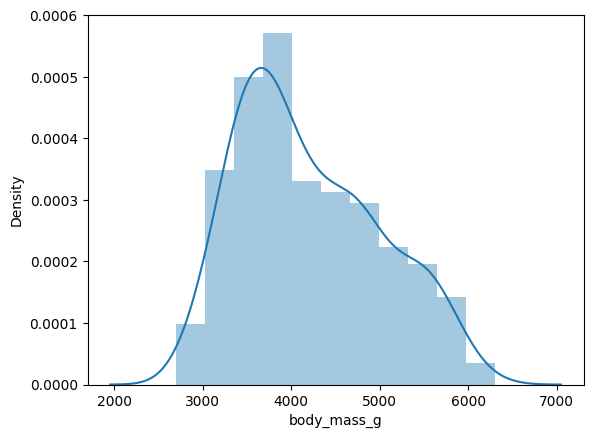

In [9]:
#univariate
sns.distplot(df.body_mass_g)

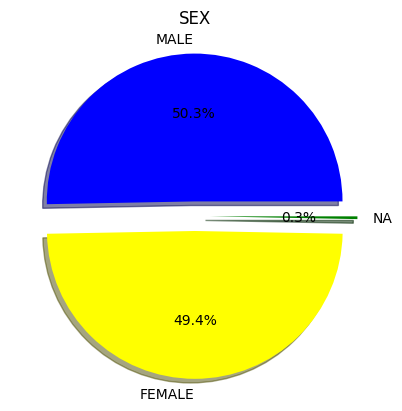

In [23]:
#univariate
plt.pie(df.sex.value_counts(),[0.1,0.1,0.1],labels = ['MALE','FEMALE','NA'],autopct ='%1.1f%%',shadow = True,colors = ['blue','yellow','green'])
plt.title('SEX')
plt.show()

Text(0.5, 1.0, 'Flipper length vs Body Mass')

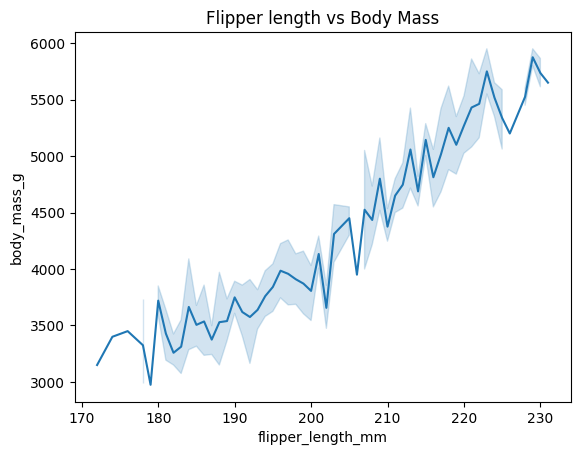

In [25]:
#bivariate
sns.lineplot(x =df.flipper_length_mm,y=df.body_mass_g)
plt.title('Flipper length vs Body Mass')

Text(0.5, 1.0, 'Culmen length vs Body Mass')

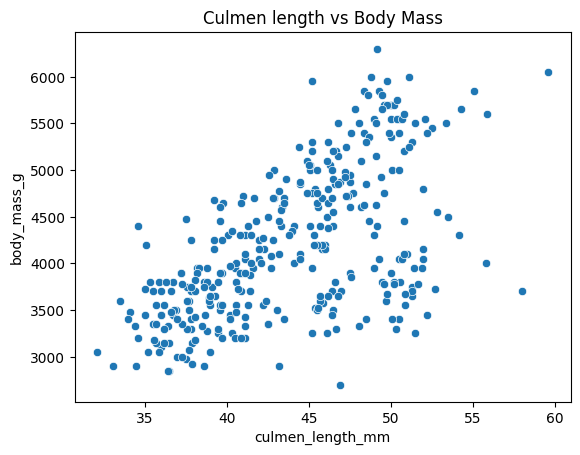

In [72]:
sns.scatterplot(x =df.culmen_length_mm,y=df.body_mass_g)
plt.title('Culmen length vs Body Mass')

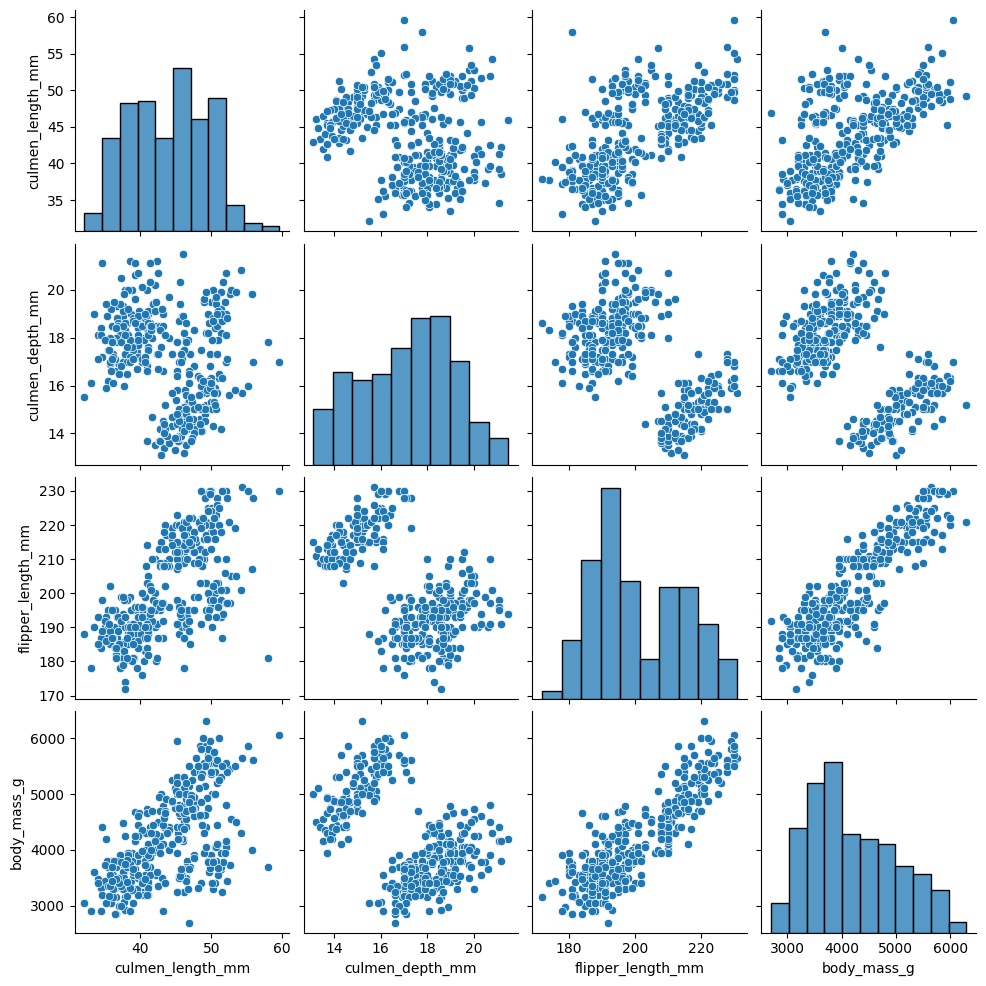

In [26]:
#multivariate
sns.pairplot(df)

<ipython-input-27-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

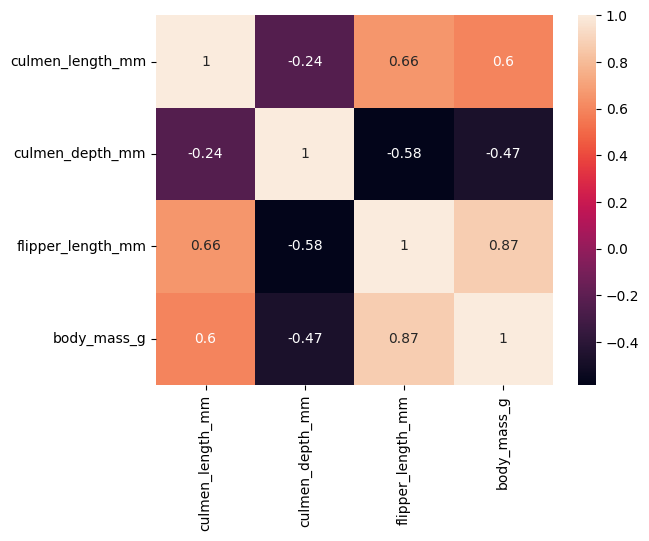

In [27]:
#multivariate
sns.heatmap(df.corr(),annot=True)

Task 4:Performing Descriptive Statistics

In [28]:
df.describe()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


Task 5:Checking for missing values and dealing with them

In [29]:
df.isnull().any()

species              False
island               False
culmen_length_mm      True
culmen_depth_mm       True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

In [30]:
df.isnull().sum()

species               0
island                0
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
sex                  10
dtype: int64

In [37]:
#we have to fill numerical values with the median
df['culmen_length_mm'].fillna(df['culmen_length_mm'].median(),inplace =True)
df['culmen_depth_mm'].fillna(df['culmen_depth_mm'].median(),inplace =True)
df['flipper_length_mm'].fillna(df['flipper_length_mm'].median(),inplace =True)
df['body_mass_g'].fillna(df['body_mass_g'].median(),inplace =True)
#we have to fill categorical values with mode
df['sex'].fillna(df['sex'].mode()[0],inplace =True)

In [38]:
df.isnull().sum()
#no more null values

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Task 6:Checking for outliers and replacing them

<Axes: >

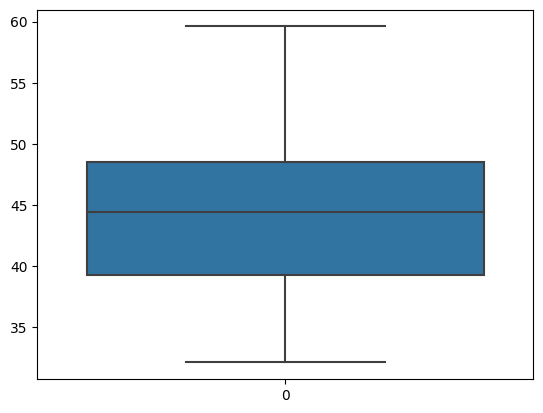

In [41]:
sns.boxplot(df.culmen_length_mm)

<Axes: >

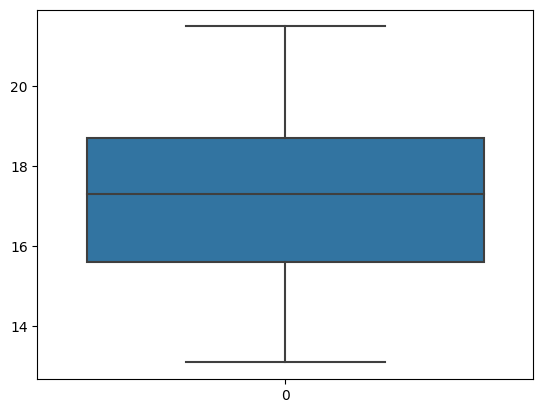

In [43]:
sns.boxplot(df.culmen_depth_mm)

<Axes: >

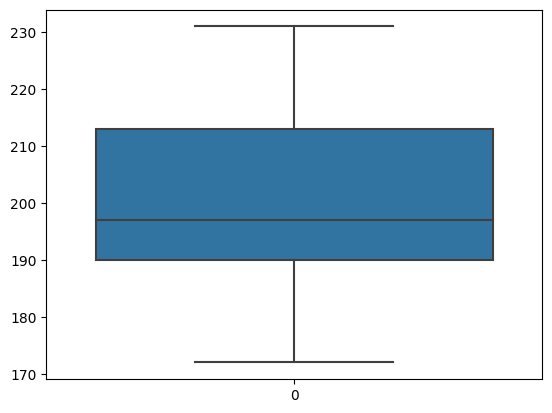

In [44]:
sns.boxplot(df.flipper_length_mm)

<Axes: >

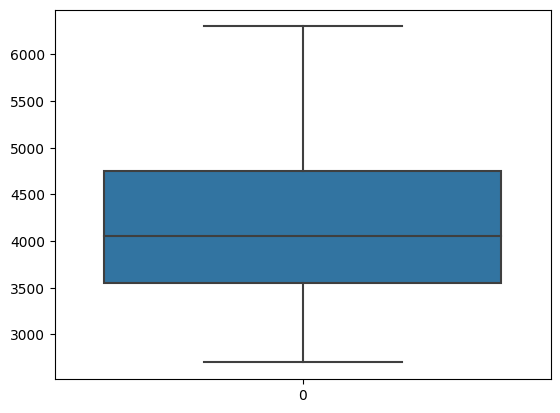

In [46]:
sns.boxplot(df.body_mass_g)

In [ ]:
#None of the numerical columns have any outliers

Task 7:Check the correlation of the independent variables with the target

In [47]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.50,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.30,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,44.45,17.3,197.0,4050.0,MALE
4,Adelie,Torgersen,36.70,19.3,193.0,3450.0,FEMALE


In [51]:
df.corrwith(df['body_mass_g'])

<ipython-input-51-19ba0c718999>:1: FutureWarning: The default value of numeric_only in DataFrame.corrwith is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corrwith(df['body_mass_g'])


culmen_length_mm     0.594925
culmen_depth_mm     -0.471942
flipper_length_mm    0.871221
body_mass_g          1.000000
dtype: float64

Task 8:Check for categorical columns and perform encoding

In [ ]:
#sex,species and island are categorical columns

In [54]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [56]:
df.species=le.fit_transform(df.species)
df.island=le.fit_transform(df.island)
df.sex=le.fit_transform(df.sex)

In [57]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,0,2,39.10,18.7,181.0,3750.0,2
1,0,2,39.50,17.4,186.0,3800.0,1
2,0,2,40.30,18.0,195.0,3250.0,1
3,0,2,44.45,17.3,197.0,4050.0,2
4,0,2,36.70,19.3,193.0,3450.0,1


Task 9:Splitting the data into dependent and independent variables

In [58]:
#I am taking body_mass_g as dependent variable
x=df.drop(columns=['body_mass_g'],axis=1)
x.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0,2,39.10,18.7,181.0,2
1,0,2,39.50,17.4,186.0,1
2,0,2,40.30,18.0,195.0,1
3,0,2,44.45,17.3,197.0,2
4,0,2,36.70,19.3,193.0,1


In [60]:
y=df['body_mass_g']
y.head()

0    3750.0
1    3800.0
2    3250.0
3    4050.0
4    3450.0
Name: body_mass_g, dtype: float64

Task 10:Scaling the data

In [61]:
#we perform the scaling on independent variables
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()

In [62]:
x_scaled=pd.DataFrame(sc.fit_transform(x),columns=x.columns)
x_scaled.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,sex
0,0.0,1.0,0.254545,0.666667,0.152542,1.0
1,0.0,1.0,0.269091,0.511905,0.237288,0.5
2,0.0,1.0,0.298182,0.583333,0.389831,0.5
3,0.0,1.0,0.449091,0.500000,0.423729,1.0
4,0.0,1.0,0.167273,0.738095,0.355932,0.5


Task 11:Split the data into training and testing

In [63]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=3)

Task 11:Checking the training and testing data's shape

In [64]:
x_train.shape

(275, 6)

In [65]:
y_train.shape

(275,)

In [66]:
x_test.shape

(69, 6)

In [67]:
y_test.shape

(69,)